* pandas and matplotlib are used for data analysis and data visualization
* numpy is used for scientific computation
* seaborn is the statistical visualization librarie

In [89]:
#importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()


Reading and making dataframe of the csv formated file


In [90]:
data=pd.read_csv('startup_funding[1].csv')

In [91]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [92]:
data.shape

(2372, 10)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [94]:
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

Here we are checking how the number of investments vary month on month



C:\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\python\Anaconda3\lib\site-packa

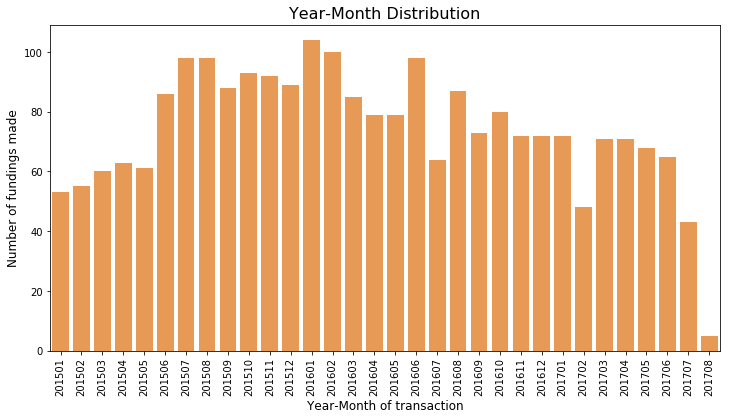

In [95]:
data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data["yearmonth"] = (pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)

cnt_srs = data['yearmonth'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

example:-
from x-axis randomly take a point
201602 means on the month of february in 2016 number of fundings made

In [96]:
data['InvestmentType'].value_counts()

Seed Funding      1271
Private Equity    1066
SeedFunding         30
Debt Funding         1
Crowd Funding        1
Crowd funding        1
PrivateEquity        1
Name: InvestmentType, dtype: int64

In [97]:
a=data['InvestmentType'].value_counts()

In [98]:
b=data['InvestmentType'].value_counts()>1

In [99]:
c=a[b].index.tolist()

In [100]:
c

['Seed Funding', 'Private Equity', 'SeedFunding']

In [101]:
data=data[data['InvestmentType'].isin(c)]

In [102]:
data

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,yearmonth
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN,201708
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,201708
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,201708
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN,201708
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN,201708
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN,201707
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN,201707
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN,201707
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN,201707
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN,201707


In [103]:
data.drop(columns=['SNo','Remarks'], inplace= True)    #these two columns are of no use,so we are removing these

In [104]:
data.shape

(2367, 9)

Here we are renaming the columns for our convenient

In [105]:
data.rename(columns={'StartupName': 'name', 'CityLocation': 'location', 'AmountInUSD' : 'amount', 'InvestmentType' : 'type'}, inplace= True)

In [106]:
data.head()

,Date,name,IndustryVertical,SubVertical,location,InvestorsName,type,amount,yearmonth
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",201708
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,201708
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,201708
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",201708
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",201708


In [107]:
data['location']=data['location'].fillna(value='NotSpecific')


Distribution of investments count across different cities


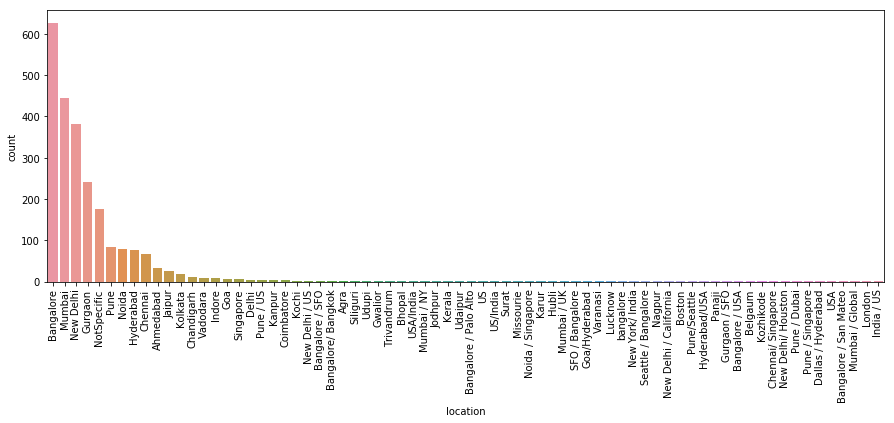

In [108]:
plt.subplots(figsize=(15,5))
p1 = sns.countplot(x = 'location',
              data = data,
              order = data['location'].value_counts().index)

plt.xticks(rotation=90);

In [109]:
data['IndustryVertical']=data['IndustryVertical'].fillna(value='Other')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2367 entries, 0 to 2371
Data columns (total 9 columns):
Date                2367 non-null object
name                2367 non-null object
IndustryVertical    2367 non-null object
SubVertical         1434 non-null object
location            2367 non-null object
InvestorsName       2359 non-null object
type                2367 non-null object
amount              1521 non-null object
yearmonth           2367 non-null int64
dtypes: int64(1), object(8)
memory usage: 264.9+ KB


In [111]:
data.head()

,Date,name,IndustryVertical,SubVertical,location,InvestorsName,type,amount,yearmonth
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",201708
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,201708
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,201708
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",201708
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",201708


Here we are converting 

In [112]:
data["amount"] = data["amount"].apply(lambda x: float(str(x).replace(",","")))
data["amount"] = pd.to_numeric(data["amount"])
data.head()     

,Date,name,IndustryVertical,SubVertical,location,InvestorsName,type,amount,yearmonth
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,201708
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,201708
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,201708
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,201708
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,201708


In [113]:
data['amount']=round(data['amount'].fillna(np.mean(data['amount'])))
data['amount']=data['amount'].astype('int')

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2367 entries, 0 to 2371
Data columns (total 9 columns):
Date                2367 non-null object
name                2367 non-null object
IndustryVertical    2367 non-null object
SubVertical         1434 non-null object
location            2367 non-null object
InvestorsName       2359 non-null object
type                2367 non-null object
amount              2367 non-null int32
yearmonth           2367 non-null int64
dtypes: int32(1), int64(1), object(7)
memory usage: 255.7+ KB


Here we are visualizing the null part(how much)

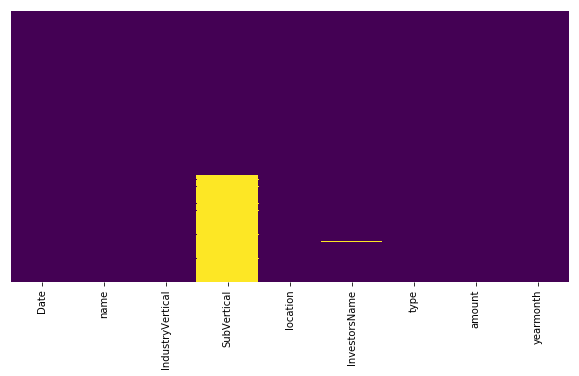

In [115]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),cmap='viridis',yticklabels=False,cbar=False)
plt.show()

In [116]:
data.head()

,Date,name,IndustryVertical,SubVertical,location,InvestorsName,type,amount,yearmonth
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000,201708
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,12056825,201708
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,12056825,201708
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000,201708
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000,201708


In [117]:
data['InvestorsName']=data['InvestorsName'].fillna(value='empty')

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2367 entries, 0 to 2371
Data columns (total 9 columns):
Date                2367 non-null object
name                2367 non-null object
IndustryVertical    2367 non-null object
SubVertical         1434 non-null object
location            2367 non-null object
InvestorsName       2367 non-null object
type                2367 non-null object
amount              2367 non-null int32
yearmonth           2367 non-null int64
dtypes: int32(1), int64(1), object(7)
memory usage: 255.7+ KB


In [119]:
data['type'][data['type']=='SeedFunding'] = 'Seed Funding'
data['type'][data['type']=='PrivateEquity'] = 'Private Equity'

C:\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [120]:
data['type'].value_counts()

Seed Funding      1301
Private Equity    1066
Name: type, dtype: int64

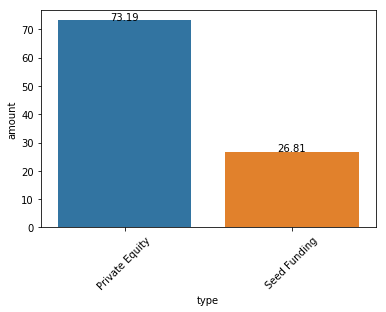

In [121]:
temp = data.groupby(['type']).agg({'amount':'sum'}).reset_index()
temp.amount = 100*temp.amount/np.sum(temp.amount)
g = sns.barplot(x=temp.type, y=temp.amount)
for index, row in temp.iterrows():
    g.text(row.name,row.amount, round(row.amount,2), color='black', ha="center")
plt.xticks(rotation=45);

In [122]:
data['Date'] = data['Date'].apply(lambda dt:dt.replace(".","/"))
data['Date'] = data['Date'].apply(lambda dt:dt.replace("//","/"))
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)
data['year'] = data['Date'].apply(lambda dt:dt.year)

In [123]:
data.head()

,Date,name,IndustryVertical,SubVertical,location,InvestorsName,type,amount,yearmonth,year
0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000,201708,2017
1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,12056825,201708,2017
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,12056825,201708,2017
3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000,201708,2017
4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000,201708,2017


In [124]:
data['year'].value_counts()

2016    992
2015    933
2017    442
Name: year, dtype: int64

In [125]:
by_year_cmp = data[['name','year']].groupby(by='year').count()

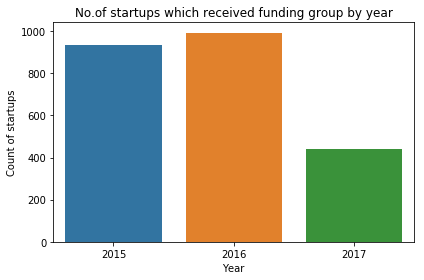

In [126]:
sns.barplot(x='year',y='name',data=by_year_cmp.reset_index())
plt.title('No.of startups which received funding group by year')
plt.xlabel('Year')
plt.ylabel('Count of startups')
plt.tight_layout()

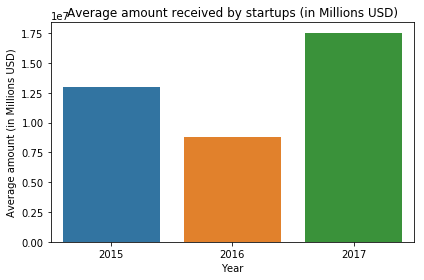

In [127]:
#Calculate the mean of funding amount group by year
by_year = data.groupby(by='year')['amount'].mean().astype('int64')
#The dataset has data for three years only. Hence, creating a list for the available years
years = ['2015','2016','2017']

#Plot average funding amount group by year
sns.barplot(x=years,y=by_year.values)
plt.xlabel('Year')
plt.ylabel('Average amount (in Millions USD)')
plt.title('Average amount received by startups (in Millions USD)')
plt.tight_layout()

Text(0.5, 1.0, 'Top 10 Investors and the count of companies')

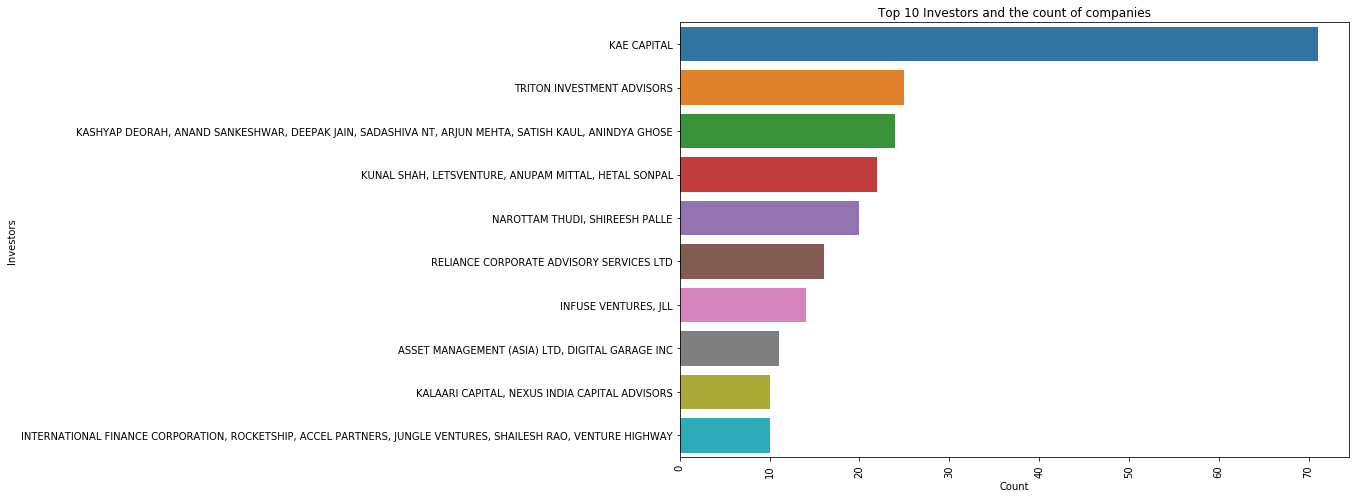

In [128]:
#Drop NA values from investor names and convert the values to upper case
data['InvestorsName'] = data['InvestorsName'].dropna()
investors = data['InvestorsName'].apply(lambda iv:str(iv).upper())
investors_count = investors.value_counts()[:10]
investors = investors.dropna().unique()[:10]
#Plot investor names and count
plt.figure(figsize=(12,8))
sns.barplot(y=investors,x=investors_count)
plt.xticks(rotation=90)
plt.ylabel('Investors')
plt.xlabel('Count')
plt.title('Top 10 Investors and the count of companies')

Text(0.5, 1.0, 'Top 5 industry verticals which received most funding')

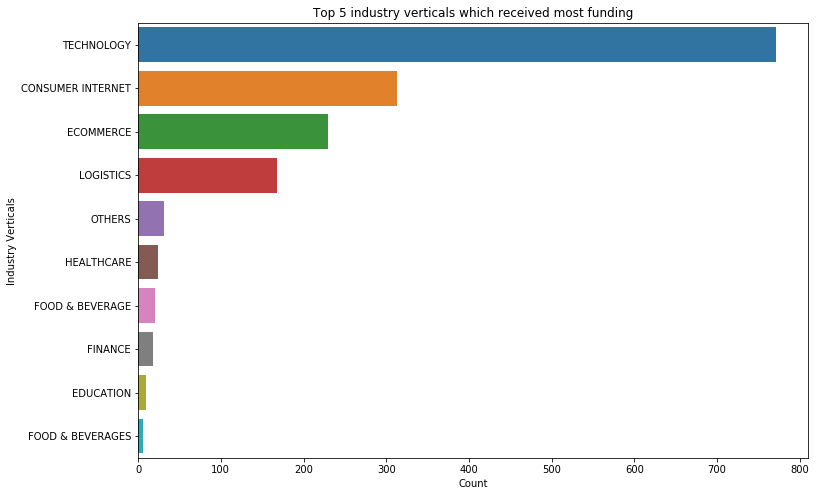

In [129]:
#Drop NA values from industry verticals
#Convert all available values to uppercase so that it would be easy to retrieve unique records
data['IndustryVertical'] = data['IndustryVertical'].dropna()
industries_vertical = data['IndustryVertical'].apply(lambda iv:str(iv).upper())
#Create new numpy arrays to store industries which received funding and its respective counts
industries = industries_vertical.dropna().unique()[:10]
industries_count = industries_vertical.value_counts()[:10]
#Plot industry verticals and count
plt.figure(figsize=(12,8))
sns.barplot(x=industries_count, y=industries,)
#plt.xticks(rotation=45)
plt.ylabel('Industry Verticals')
plt.xlabel('Count')
plt.title('Top 5 industry verticals which received most funding')
#plt.tight_layout()

Conclusion:-
 * There were 50% relation between funded amount and number of investors per startup
 * Most funding came through private equity(we have seen from the graph)
 * 2016 had highest amount of investments
 * Maximum Total funding was generated in the year 2015 and then it slowly decreased with increase in years
 * Technology is the top most industry vertical which received more funding




